# NEURAL NETWORKS FOR GALAXIES AND QUASARS
Again we have a dataset with measurements of the intensity of the signal in different wavelength regions (colours) coming from some astronomical source and we want to build a classifier that discriminates between galaxies and quasars.

In this case, we build a Neural Network to complete the task. First of all, we plot the data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from tqdm import tqdm

2024-12-01 17:59:59.124454: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 17:59:59.133953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733072399.144433  303060 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733072399.147440  303060 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 17:59:59.158701: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
full = np.loadtxt("../solutions/galaxyquasar.csv", dtype = str, delimiter=',')
full_data = np.delete(full, [0], axis=0)
names = np.delete(full, range(1, len(full[:, 0])), axis=0)
print(names)

[['u' 'g' 'r' 'i' 'z' 'class' 'z1' 'zerr']]


In [3]:
colors = np.zeros((len(full_data[:, 0]), 4))
labels = np.array([])
for i in range(len(full_data[:, 0])):
    colors[i] = np.array([float(full_data[i, 0]) - float(full_data[i, 1]), float(full_data[i, 1]) - float(full_data[i, 2]), \
                          float(full_data[i, 2]) - float(full_data[i, 3]), float(full_data[i, 3]) - float(full_data[i, 4])])
    if full_data[i, 5] == "GALAXY":
        labels = np.append(labels, 0)
    else:
        labels = np.append(labels, 1)

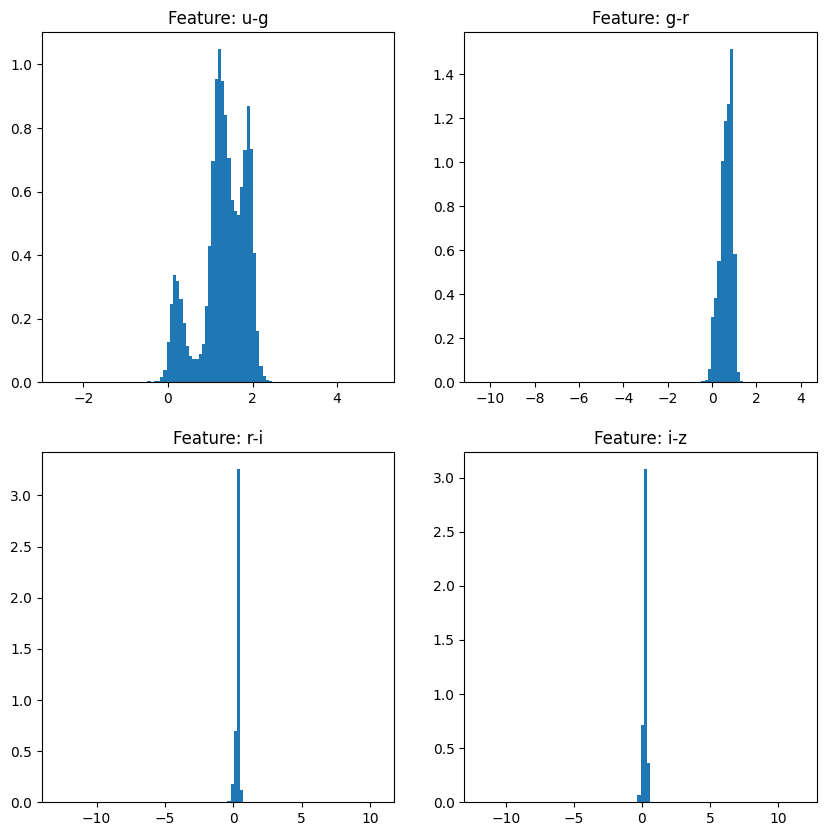

In [4]:
plt.figure(figsize=(10, 10))
title = [r"u-g", r"g-r", r"r-i", r"i-z"]
for i in range(0, 4):
    plt.subplot(2,2,i+1)
    plt.hist(colors[:, i], bins = 100, density=True)
    plt.title("Feature: " + title[i])

## An initial neural network
We build now a simple neural network, with one hidden layer with five neurons activated using a ReLu function. As a learning rate for the optimizer, we choose a constant rate of 0.01. We train it on 70% of the full dataset, we compute the accuracy on the rest of the dataset and plot the ROC curve:

In [5]:
sc = StandardScaler()
sc.fit(colors)
X = sc.transform(colors)

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.05))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(colors, labels, train_size=0.70)
model = keras.models.Sequential([\
            keras.layers.InputLayer(shape=(4,)), \
            keras.layers.Dense(5, activation='relu'), \
            keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='binary_crossentropy', metrics=['accuracy'])
res = model.fit(X_train, y_train, epochs=30, shuffle=True, validation_data=(X_test, y_test), validation_freq=30)

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9521 - loss: 0.1460
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9806 - loss: 0.0802
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9802 - loss: 0.0793  
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9804 - loss: 0.0784
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9821 - loss: 0.0761
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9805 - loss: 0.0755
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9802 - loss: 0.0750
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9821 - loss: 0.0703
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9802 - loss: 0.0730
Epoch 10/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9831 - loss: 0.0685
Epoch 11/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9823 - loss: 0.0674
Epoch 12/30
1094/1094 

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy on the validation set: 98.111%


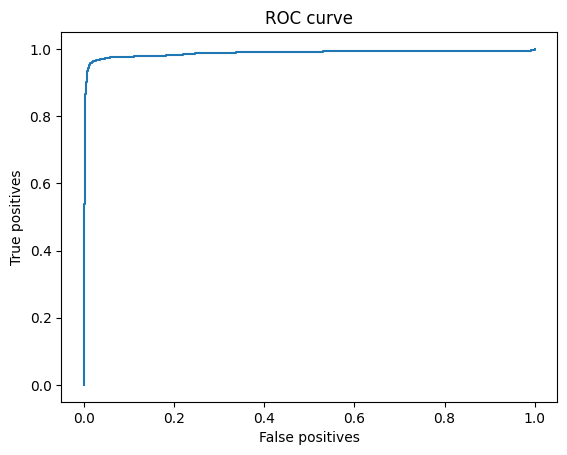

In [20]:
y_probs = model.predict(X_test)
fps, tps, _ = roc_curve(y_test, y_probs)
print("Accuracy on the validation set: {:.3f}%".format(res.history['accuracy'][-1] * 100))
plt.plot(fps, tps)
plt.xlabel("False positives")
plt.ylabel("True positives")
_ = plt.title("ROC curve")

## Setting the hyperparameters
Now we want to optimize the network. We'll try with one to eight neurons, one or two layers (with the same number of neurons) and two different activating functions: the Relu and the Sigmoid functions. We'll plot the accuracy for training and validation sets, performing a 5-fold cross-validation, as a function of the number of neurons, for all the four possibilities. Them we'll plot the accuracy on the validation set for all the models on the same graph to see the best performance.

In [9]:
def select_model(n_l = 1, n_n = 2, act_f='relu'):
    if n_l == 1:
        return keras.models.Sequential([\
            keras.layers.InputLayer(shape=(4,)), \
            keras.layers.Dense(n_n, activation=act_f), \
            keras.layers.Dense(1, activation=act_f)])
    else:
        if n_l == 2:
            return keras.models.Sequential([\
                keras.layers.InputLayer(shape=(4,)), \
                keras.layers.Dense(n_n, activation=act_f), \
                keras.layers.Dense(n_n, activation=act_f), \
                keras.layers.Dense(1, activation=act_f)])

In [10]:
dim_sample = len(colors[:,0])
n_epochs = 10
rng = np.random.default_rng(seed=130301)
indices = np.arange(dim_sample)
rng.shuffle(indices)

K = 5
n_neurons = 8
n_layers = 2
n_act_f = 2
act_f_names = ['relu', 'sigmoid']

train_len = int(dim_sample - dim_sample / K)
val_len = int(dim_sample / K)
acc_tr = np.zeros(K)
acc_te = np.zeros(K)
acc_tr_model = np.zeros((n_layers, n_act_f, n_neurons))
acc_te_model = np.zeros((n_layers, n_act_f, n_neurons))
for a_f in range(n_act_f):
    print("Activation function: " + act_f_names[a_f])
    for l in range(1, n_layers + 1):
        print("\tNumber of layers: {}".format(l))
        print("\tNumber of neurons scanned:")
        for neu in tqdm(range(1, n_neurons + 1)):
            for i in range(0, K):
                test_data = indices[val_len * i : val_len * (i+1)]
                train_data = indices[0:val_len * i]
                train_data = np.append(train_data, indices[val_len * (i+1) : dim_sample])
                model = select_model(l, neu, act_f_names[a_f])
                model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='binary_crossentropy', metrics=['accuracy'])
                res = model.fit(colors[train_data], labels[train_data], validation_data=(colors[test_data], labels[test_data]), \
                            epochs=n_epochs, validation_freq=n_epochs, verbose = 0, callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])
                acc_tr[i] = res.history['accuracy'][-1]
                acc_te[i] = res.history['val_accuracy'][-1]
            acc_tr_model[l-1, a_f, neu-1], acc_te_model[l-1, a_f, neu-1] = np.mean(acc_tr), np.mean(acc_te)

Activation function: relu
	Number of layers: 1
	Number of neurons scanned:


100%|█████████████████████████████████████████████████████████████████████████████████████| 8/8 [07:33<00:00, 56.67s/it]


	Number of layers: 2
	Number of neurons scanned:


100%|█████████████████████████████████████████████████████████████████████████████████████| 8/8 [08:00<00:00, 60.10s/it]


Activation function: sigmoid
	Number of layers: 1
	Number of neurons scanned:


100%|█████████████████████████████████████████████████████████████████████████████████████| 8/8 [07:21<00:00, 55.24s/it]


	Number of layers: 2
	Number of neurons scanned:


100%|█████████████████████████████████████████████████████████████████████████████████████| 8/8 [08:07<00:00, 60.99s/it]


0.9839999914169312

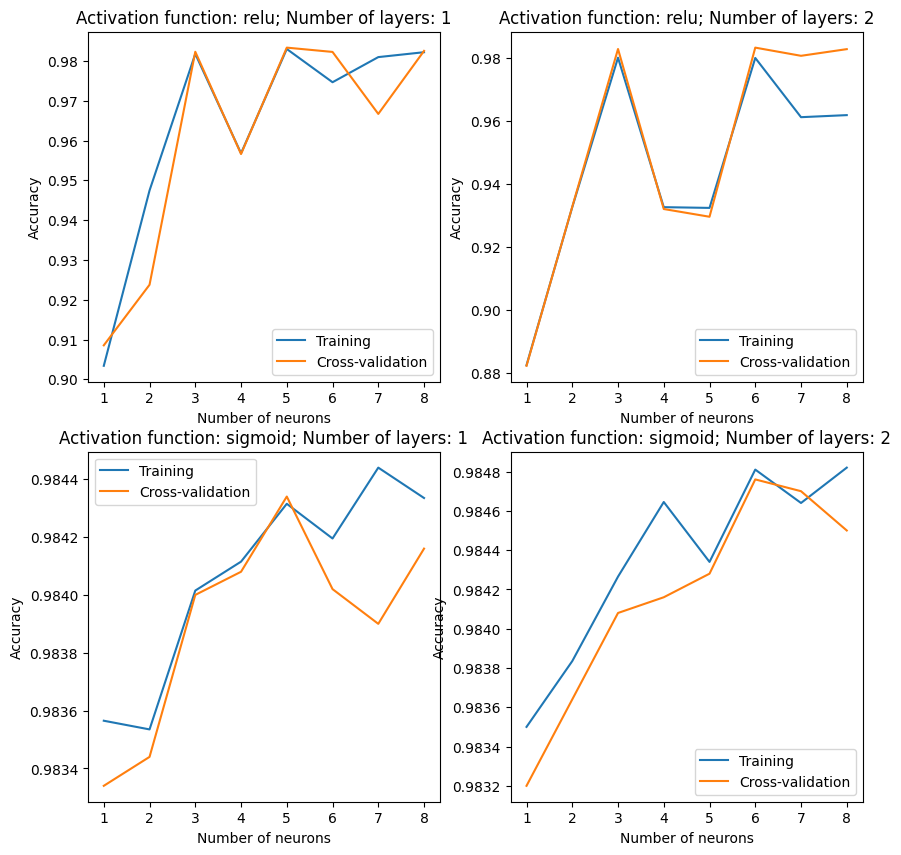

In [11]:
plt.figure(figsize=(10, 10))
pl = 1
for a_f in range(n_act_f):
    for l in range(1, n_layers + 1):
        plt.subplot(n_act_f, n_layers, pl)
        pl += 1
        plt.plot(range(1, n_neurons + 1), acc_tr_model[l-1, a_f, :], label="Training")
        plt.plot(range(1, n_neurons + 1), acc_te_model[l-1, a_f, :], label="Cross-validation")
        plt.legend()
        plt.xlabel("Number of neurons")
        plt.ylabel("Accuracy")
        plt.title("Activation function: " + act_f_names[a_f] + "; Number of layers: {}".format(l))

Text(0.5, 1.0, 'Accuracy curves')

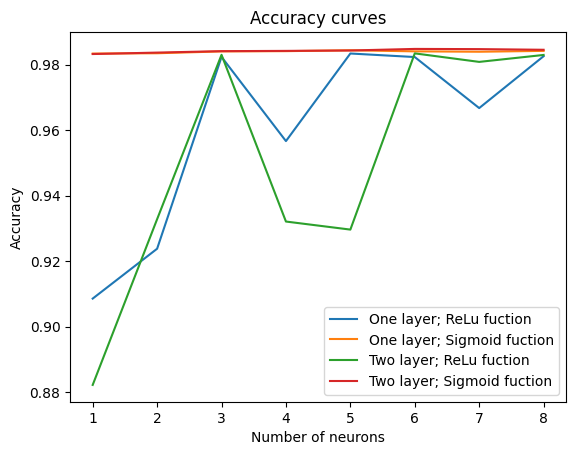

In [12]:
plt.plot(range(1, n_neurons + 1), acc_te_model[0, 0, :], label="One layer; ReLu fuction")
plt.plot(range(1, n_neurons + 1), acc_te_model[0, 1, :], label="One layer; Sigmoid fuction")
plt.plot(range(1, n_neurons + 1), acc_te_model[1, 0, :], label="Two layer; ReLu fuction")
plt.plot(range(1, n_neurons + 1), acc_te_model[1, 1, :], label="Two layer; Sigmoid fuction")
plt.legend()
plt.xlabel("Number of neurons")
plt.ylabel("Accuracy")
plt.title("Accuracy curves")

The (two layers, Sigmoid function) NN with 7 neurons per layer seems to be the best. So we compare it with the initial one:

In [21]:
n_l_best = 2
act_best = 'sigmoid'
n_neurons_best = 7

model = select_model(n_l_best, n_neurons_best, act_best)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='binary_crossentropy', metrics=['accuracy'])
res_final = model.fit(X_train, y_train, epochs=30, shuffle=True, validation_data=(X_test, y_test), \
          callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)], validation_freq=30)

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9293 - loss: 0.2034 - learning_rate: 0.0100
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9830 - loss: 0.0670 - learning_rate: 0.0100
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9834 - loss: 0.0682 - learning_rate: 0.0100
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9834 - loss: 0.0671 - learning_rate: 0.0100
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s -5342us/step - accuracy: 0.9836 - loss: 0.0622 - learning_rate: 0.0100
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9834 - loss: 0.0663 - learning_rate: 0.0095
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9839 - loss: 0.0611 - learning_rate: 0.0090
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9845 - loss: 0.0593 - learning_rate: 0.0086
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9845 - loss: 0.0596 - learning

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy on the validation set, initial NN: 98.111%
Accuracy on the validation set, final NN: 98.466%


Text(0.5, 1.0, 'ROC curve: initial vs final')

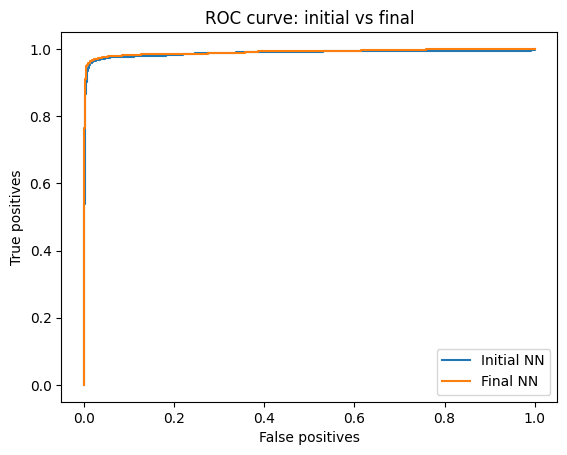

In [22]:
y_probs = model.predict(X_test)
fps_final, tps_final, _ = roc_curve(y_test, y_probs)
print("Accuracy on the validation set, initial NN: {:.3f}%".format(res.history['accuracy'][-1] * 100))
print("Accuracy on the validation set, final NN: {:.3f}%".format(res_final.history['accuracy'][-1] * 100))
plt.plot(fps, tps, label = "Initial NN")
plt.plot(fps_final, tps_final, label="Final NN")
plt.legend()
plt.xlabel("False positives")
plt.ylabel("True positives")
plt.title("ROC curve: initial vs final")

Although the improvement is small, the final NN seems to be better than the initial one.

However, in this case the performance of the networks here are very similar to the ones of simpler classifiers used in the "Time to get hands dirty" of Lecture 19, so in this case the higher complexity of the Neural Network doesn't give relevant improvements.